In [2]:
# pip install -U --user numexpr

     |████████████████████████████████| 381 kB 17.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/pytorch_time_elapsed_NVIDIA A100-SXM4-80GB.csv")
# df2 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/pytorch_time_elapsed_Tesla K80.csv")
# df3 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/pytorch_time_elapsed_Tesla P100-PCIE-12GB.csv")
df4 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/pytorch_time_elapsed_Tesla V100-SXM2-32GB.csv")
df5 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/crypten_time_elapsed_NVIDIA A100-SXM4-80GB.csv")
df6 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/crypten_time_elapsed_Tesla V100-SXM2-32GB.csv")

In [4]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10])
df1['run_number'] = s
# df2['run_number'] = s
# df3['run_number'] = s
df4['run_number'] = s

In [5]:
df1.rename(columns={'time_elapsed': 'pytorch_A100'}, inplace=True)
# df2.rename(columns={'time_elapsed': 'pytorch_K80'}, inplace=True)
# df3.rename(columns={'time_elapsed': 'pytorch_P100'}, inplace=True)
df4.rename(columns={'time_elapsed': 'pytorch_V100'}, inplace=True)
df5.rename(columns={'time': 'crypten_A100'}, inplace=True)
df6.rename(columns={'time': 'crypten_V100'}, inplace=True)

In [6]:
# df_mid1 = pd.merge(df1, df2, on='run_number', how='left')
# df_mid2 = pd.merge(df_mid1, df3, on='run_number', how='left')
# df = pd.merge(df_mid2, df4, on='run_number', how='left')

df = pd.merge(df1, df4, on='run_number', how='left')

df = df.drop('device_x', axis=1)
df = df.drop('device_y', axis=1)
df = df.drop('run_x', axis=1)
df = df.drop('run_y', axis=1)
df = df.set_index('run_number')
df.head()

,pytorch_A100,pytorch_V100
run_number,,
1,1.168484,1.013908
2,1.143213,1.024392
3,1.139673,0.987177
4,1.141427,1.006721
5,1.145075,0.994016


In [ ]:
# df_test = df.copy()
# df_test.head()

In [9]:
# for column in df_test:
#     df_test[column] = df_test[column].cumsum()

# df_test.head()

In [10]:
# plt.plot(df_test)
# plt.legend(("A100", "K80", "P100", "V100"))
# plt.title("Vanilla PyTorch Benchmarks by GPU")
# plt.xlabel("Run Number")
# plt.ylabel("Inference Time (s)")
# plt.xticks([1,2,3,4,5,6,7,8,9,10])
# plt.show()

In [11]:
df.loc['mean'] = df.mean()

In [12]:
df

,pytorch_A100,pytorch_V100
run_number,,
1,1.168484,1.013908
2,1.143213,1.024392
3,1.139673,0.987177
4,1.141427,1.006721
5,1.145075,0.994016
6,1.148993,0.987917
7,1.147879,0.995026
8,1.140018,0.997701
9,1.142283,0.993648


In [13]:
df_means = df.loc[['mean'],:]
df_means

,pytorch_A100,pytorch_V100
run_number,,
mean,1.146163,0.999561


In [15]:
df5.head()

,device,crypten_A100
0,NVIDIA A100-SXM4-80GB,1426.016529


In [16]:
df6.head()

,device,crypten_V100
0,Tesla V100-SXM2-32GB,770.035461


In [43]:
pytorch_a100 = df_means.loc[df_means["pytorch_A100"] > 1]["pytorch_A100"].values
pytorch_v100 = df_means.loc[df_means["pytorch_V100"] < 1]["pytorch_V100"].values
crypten_a100 = df5.loc[df5["crypten_A100"] > 0]["crypten_A100"].values
crypten_v100 = df6.loc[df6["crypten_V100"] > 0]["crypten_V100"].values

In [44]:
df_means['crypten_A100'] = crypten_a100

In [45]:
df_means['crypten_V100'] = crypten_v100

In [46]:
df_means

,pytorch_A100,pytorch_V100,crypten_A100,crypten_V100
run_number,,,,
mean,1.146163,0.999561,1426.016529,770.035461


In [47]:
df_transpose = df_means.transpose()
df_transpose

run_number,mean
pytorch_A100,1.146163
pytorch_V100,0.999561
crypten_A100,1426.016529
crypten_V100,770.035461


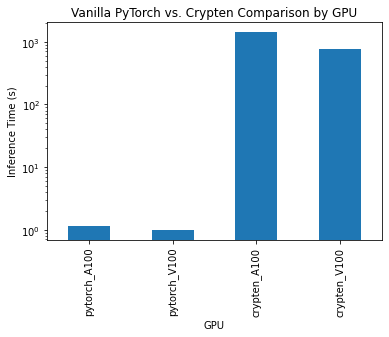

In [48]:
df_transpose.plot(kind="bar", title="test")
plt.title("Vanilla PyTorch vs. Crypten Comparison by GPU")
plt.xlabel("GPU")
_ = plt.ylabel("Inference Time (s)")
plt.yscale("log")
_ = plt.legend('',frameon=False)

In [59]:
data = [[pytorch_a100,crypten_a100],[pytorch_v100,crypten_v100]]
df_final = pd.DataFrame(data, columns=['PyTorch', 'Crypten'])

In [60]:
s = ["A100", "V100"]
df_final['GPU'] = s
df_final = df_final.set_index('GPU')
df_final

,PyTorch,Crypten
GPU,,
A100,[1.1461627005995978],[1426.016528827]
V100,[0.9995608741417528],[770.0354613121599]


In [63]:
df_final['PyTorch']=df_final['PyTorch'].astype(float)
df_final['Crypten']=df_final['Crypten'].astype(float)

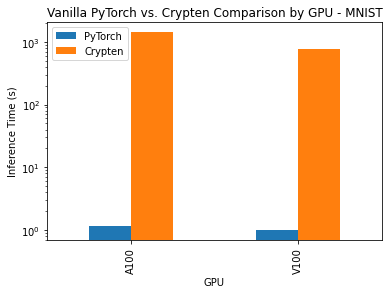

In [64]:
df_final.plot(kind="bar", title="test")
plt.title("Vanilla PyTorch vs. Crypten Comparison by GPU - MNIST")
plt.xlabel("GPU")
_ = plt.ylabel("Inference Time (s)")
plt.yscale("log")

In [65]:
df7 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/pt_text_classification_time_elapsed_Tesla V100-SXM2-32GB.csv")

